<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Decision_tree_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Entropy calculator for a given probability distribution array

def my_entropy(p):
    N=len(p)
    ENT =0
    for i in range(N):
        if p[i] ==0 or p[i]==1:
            ENT =0
        else:
            ENT = ENT - p[i] * np.log2(p[i])
    
    return ENT

p=np.array([1/4,1/4,1/4,1/4 ])
print(my_entropy(p))

2.0


Text(0, 0.5, 'Entropy ')

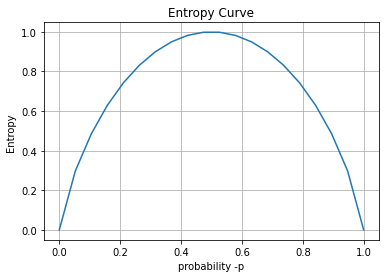

In [3]:
# to have the entropy curve

N=20
x=np.linspace(0,1,N)
y_entropy=[]
for i in range(N):
    p=np.array([x[i],(1-x[i])])
    value = my_entropy(p)
    y_entropy.append(value)


plt.plot(x,y_entropy)
plt.title('Entropy Curve')
plt.grid()
plt.xlabel('probability -p')
plt.ylabel('Entropy ')

In [4]:
# Gini Index  calculator

def my_gini(p):
    N=len(p)
    gi = 1
    for i in range(N):
        gi = gi - p[i]*p[i]
    
    return gi

p=np.array([1/4, 1/4, 1/4, 1/4 ])
print(my_gini(p))

0.75


Text(0, 0.5, 'Funtion of Probability  ')

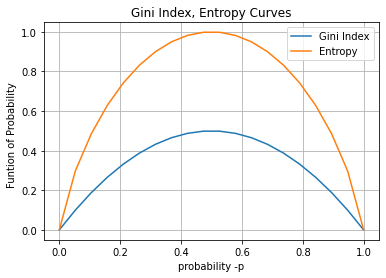

In [5]:
# to have the gini index curve

N=20
x=np.linspace(0,1,N)
y_gini=[]
y_ent=[]
for i in range(N):
    p=np.array([x[i],(1-x[i])])
    value1 = my_gini(p)
    value2 = my_entropy(p)
    y_gini.append(value1)
    y_ent.append(value2)


plt.plot(x,y_gini, label= 'Gini Index')
plt.plot(x,y_ent, label= 'Entropy')
plt.title('Gini Index, Entropy Curves')
plt.grid()
plt.legend()
plt.xlabel('probability -p')
plt.ylabel('Funtion of Probability  ')

Example 1 DecisionTreeRegressor

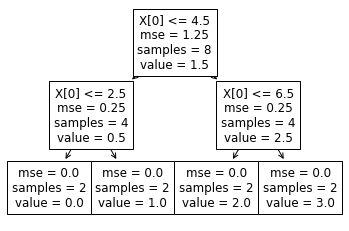

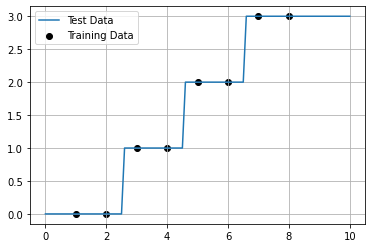

In [6]:
# Example 1

# Importing the required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Defining the input and Output
X_train=np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
y_train=np.array([0,0,1,1,2,2,3,3])

# to fit the model for the training data
model=DecisionTreeRegressor(max_depth=2)
model.fit(X_train,y_train)

tree.plot_tree(model)
plt.show()

# To test the model
X_test=np.arange(0,10.1,0.1).reshape(-1,1)
y_hat=model.predict(X_test)

plt.plot(X_test,y_hat,label='Test Data')
plt.scatter(X_train,y_train,label='Training Data',c='k')
plt.legend()
plt.grid()
plt.show()

Example 2: Sine wave

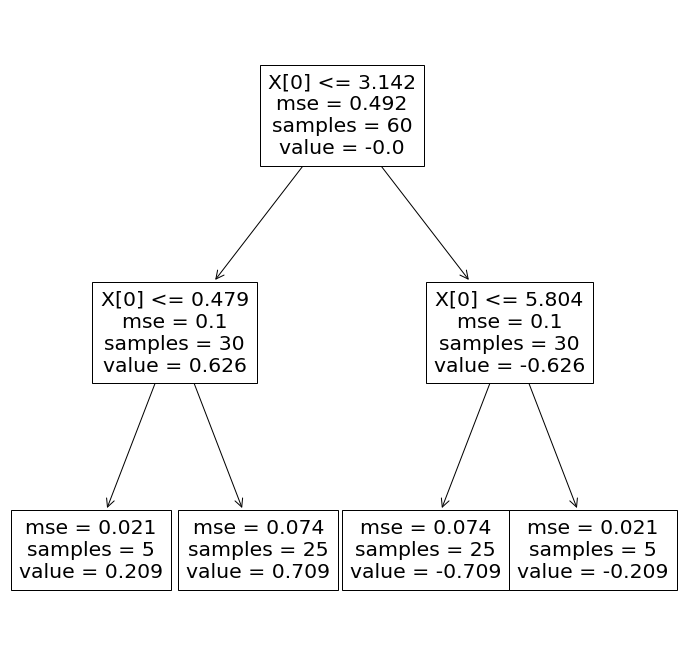

Depth of Training = 2
mean square error =  0.065


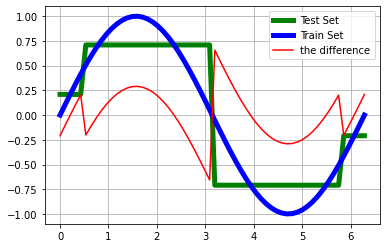

In [7]:
# Example 2
# Importing the required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

M=60
X=np.linspace(0,2*np.pi,M)
X=X.reshape(M,1)
y=np.sin(X)

# training the Model
N=2     # number of levels/depths in the Decision Tree
model=DecisionTreeRegressor(max_depth=N )
model.fit(X,y)

plt.figure(figsize=(12,12))
tree.plot_tree(model);
plt.show()

# test the Model, using same training data X
y_hat=model.predict(X)

the_diff = (y.T- y_hat).T

plt.plot(X,y_hat,label='Test Set',c='g',lw=5)
plt.plot(X,y,label='Train Set',c='b',lw=5)
plt.plot(X,the_diff,label='the difference',  c='r')
plt.legend()
plt.grid()
print("Depth of Training = ", end=''), print(N)

mse=np.mean(np.power(the_diff,2))
print('mean square error = ', round(mse,3))
# observe the decrease in mse, with increase in number of depths

In [8]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y,y_hat)

print('mean absolute error =',round(mae,3))

from sklearn.metrics import mean_squared_error
msqe=mean_squared_error(y,y_hat)

print('mean squared error =',round(msqe,3))

mean absolute error = 0.209
mean squared error = 0.065


mse =  0.0


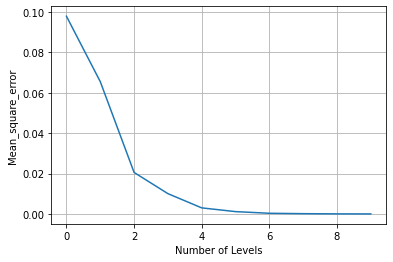

In [9]:
# To compute the mean square error for varying depth
# the data set
M=100
X=np.linspace(0,2*np.pi,M)
X=X.reshape(M,1)
y=np.sin(X)
#X_test=np.cos(X)

mse=[]
for depth in range(10):
    model=DecisionTreeRegressor(max_depth=depth+1)
    model.fit(X,y)
    y_hat=model.predict(X)
    the_diff = (y.T- y_hat).T
    diff_squared = np.power((y-y_hat),2)
    value=np.mean(np.power(the_diff,2))
    mse.append(value)

plt.plot(mse)
plt.xlabel('Number of Levels')
plt.ylabel('Mean_square_error')
plt.grid()

print('mse = ', round(mse[-1],3))


**Example 3: Boston Set**

In [11]:
from sklearn.datasets import load_boston
import pandas as pd
d = load_boston()
X_full=d['data']
y_full=d['target']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full,y_full,train_size=0.8,shuffle=True,random_state=42)

N=4
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=N)
reg.fit(X_train,y_train)

y_hat=reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_hat)
print('Mean Square Error =  ', end='')
print(mse)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_hat)
print('Mean Absolute Error =  ', end='')
print(mae)

Mean Square Error =  10.747180683038662
Mean Absolute Error =  2.630697886796957


[Text(757.6293103448277, 733.86, 'X[5] <= 6.941\nmse = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(384.82758620689657, 570.78, 'X[12] <= 14.4\nmse = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(192.41379310344828, 407.70000000000005, 'X[7] <= 1.385\nmse = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(96.20689655172414, 244.62, 'X[12] <= 10.505\nmse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(48.10344827586207, 81.54000000000008, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(144.31034482758622, 81.54000000000008, 'mse = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(288.62068965517244, 244.62, 'X[5] <= 6.543\nmse = 15.197\nsamples = 199\nvalue = 22.899'),
 Text(240.51724137931035, 81.54000000000008, 'mse = 8.635\nsamples = 156\nvalue = 21.632'),
 Text(336.7241379310345, 81.54000000000008, 'mse = 12.03\nsamples = 43\nvalue = 27.498'),
 Text(577.2413793103449, 407.70000000000005, 'X[0] <= 6.926\nmse = 19.005\nsamples = 134\nvalue = 14.829'),
 Text(481.0344827586207, 244.62, 'X[6] <= 7

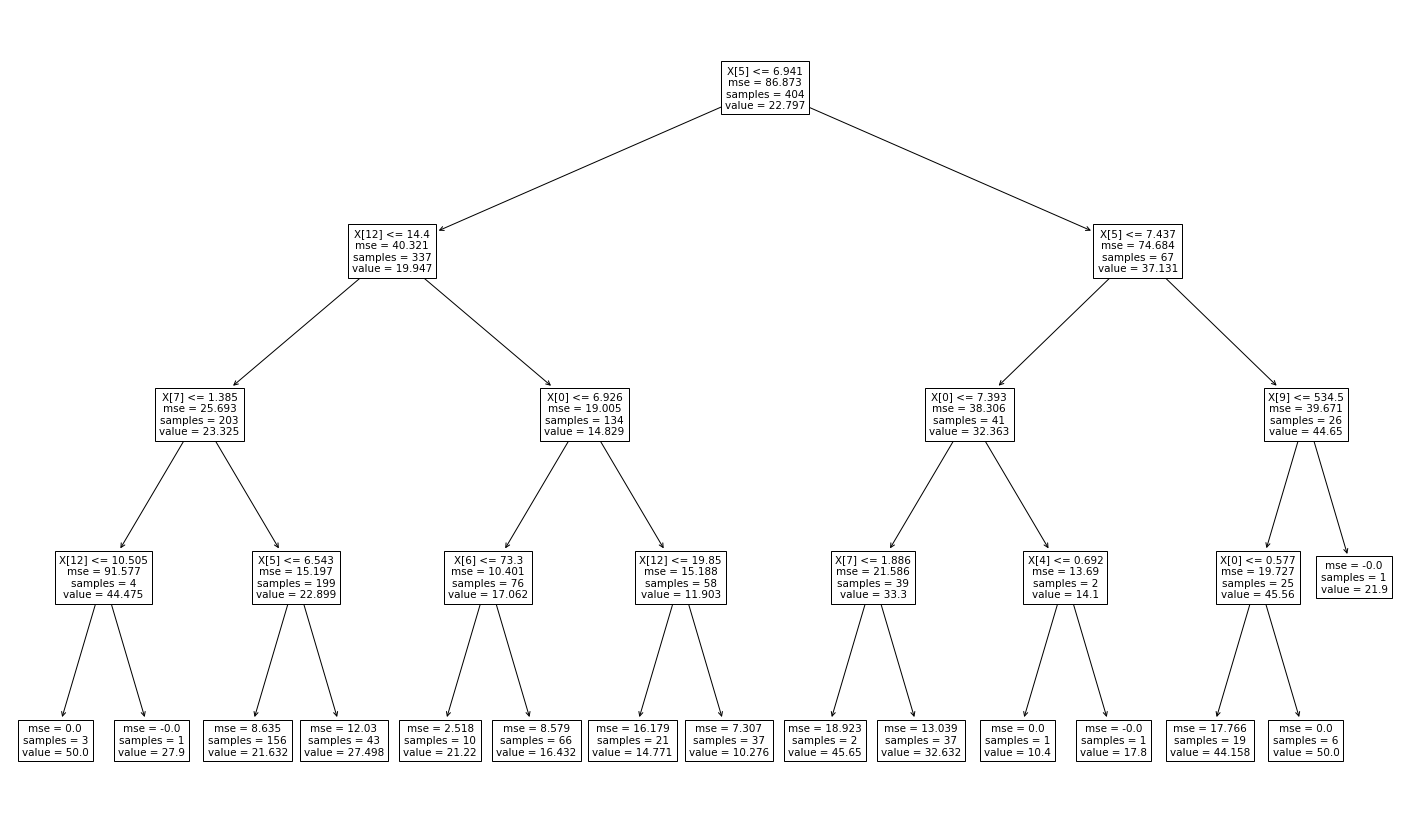

In [13]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(reg)

Example 4: Boston data in a loop, to obtain best Depth

In [14]:
from sklearn.datasets import load_boston
d = load_boston()
X_full=d['data']
y_full=d['target']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_full,y_full,train_size=0.8,random_state=42)

for N in range(1,10):
    print('For Depth = ', end=''), print(N)
    reg=DecisionTreeRegressor(max_depth=N)
    reg.fit(X_train,y_train)
    y_hat=reg.predict(X_test)
    mse=mean_squared_error(y_test,y_hat)
    mae=mean_absolute_error(y_test,y_hat)
    #print('\tMean Square Error =  ', end=''), print(mse)
    print('\tMean Absolute Error =  ', end=''), print(mae)

print('\n\n Hence, we can select N = 7')

For Depth = 1
	Mean Absolute Error =  4.892007409279314
For Depth = 2
	Mean Absolute Error =  3.6797926100884855
For Depth = 3
	Mean Absolute Error =  3.1777352113222603
For Depth = 4
	Mean Absolute Error =  2.6130508279734275
For Depth = 5
	Mean Absolute Error =  2.290509757509241
For Depth = 6
	Mean Absolute Error =  2.5879064431852874
For Depth = 7
	Mean Absolute Error =  2.3290393272693692
For Depth = 8
	Mean Absolute Error =  2.266797866205305
For Depth = 9
	Mean Absolute Error =  2.2896562791783373


 Hence, we can select N = 7


# Example 5: Iris Data - Decision Tree Classifier

In [15]:
from sklearn.datasets import load_iris
d=load_iris()
X_FULL=d['data']
y_full=d['target']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_FULL,y_full,train_size=0.6,random_state=42)
X_train.shape,  y_train.shape,  X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for N in range(1,5):
    print('Depth = ', end=''), print(N)
    CLF=DecisionTreeClassifier(max_depth=N)
    CLF.fit(X_train,y_train)
    y_hat=CLF.predict(X_test)
    #cnf=confusion_matrix(y_test,y_hat)
    #print('Confusion Matrix = ')
    #print(cnf)
    accuracy=accuracy_score(y_test,y_hat)
    print('\tAccuracy Score = ', end=''), print(accuracy)

print('\n\n From above, we can select N = 2')

Depth = 1
	Accuracy Score = 0.6833333333333333
Depth = 2
	Accuracy Score = 0.9833333333333333
Depth = 3
	Accuracy Score = 0.9833333333333333
Depth = 4
	Accuracy Score = 0.9833333333333333


 From above, we can select N = 2


Example 6: Iris Data: Logistic Regression

In [18]:
from sklearn.datasets import load_iris
d=load_iris()
X_FULL=d['data']
y_full=d['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_FULL,y_full,train_size=0.6,random_state=42)
X_train.shape,  y_train.shape,  X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [19]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_hat=LR.predict(X_test)
cnf=confusion_matrix(y_test,y_hat)
print('Confusion Matrix = '), print(cnf)
accuracy=accuracy_score(y_test,y_hat)
print('\n\nAccuracy Score = ', end=''), print(accuracy)

Confusion Matrix = 
[[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]


Accuracy Score = 1.0


(None, None)

In [22]:
# Example VI
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import tree


d = load_iris()
X = d['data']
y = d['target']
d['feature_names']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

#model = DecisionTreeClassifier(max_depth=2, criterion = 'entropy')
model = DecisionTreeClassifier(max_depth=2, criterion = 'gini')
model.fit(train_X,train_y)
y_hat=model.predict(test_X)
print('Actual output    =',test_y)
print('Predicted output = ',y_hat)
con_mat=confusion_matrix(test_y,y_hat)
print(con_mat)
AC=accuracy_score(test_y,y_hat)
print('\n Accuracy Score = ', AC)
plot_tree(model)


Actual output    = [2 2 2 2 2 1 1 1 2 2 0 2 0 0 0 2 1 2 0 0 1 1 0 0 1 0 2 0 1 1 1 2 1 1 1 2 1
 0 1 1 2 0 2 2 2]
Predicted output =  [2 1 2 2 2 1 1 1 2 2 0 2 0 0 0 2 1 2 0 0 1 1 0 0 1 0 1 0 1 1 1 2 1 1 1 1 1
 0 1 1 2 0 2 2 2]
[[12  0  0]
 [ 0 16  0]
 [ 0  3 14]]

 Accuracy Score =  0.9333333333333333


NameError: ignored

**Example 7: Sunny, windy, rain, - Go to Play?**

In [23]:
# this cell is just to understand OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
Outcast=np.array( ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain','Rain','Overcast','Sunny', 'Sunny', 'Rain','Sunny', 'Overcast','Overcast', 'Rain'])
OHC=OneHotEncoder(handle_unknown='ignore')
A=OHC.fit_transform(Outcast.reshape(14,1))
A=A.toarray()
print('Outcast =',A)

Outcast = [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [25]:
# Same example, once again
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

outlook = pd.Series(['sunny','sunny','overcast','rain','rain','rain','overcast','sunny','sunny','rain','sunny','overcast','overcast','rain'])
temp = pd.Series(['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild'])
h= pd.Series(['h','h','h','h','n','n','n','h','n','n','n','h','n','h'])
w = pd.Series(['w','s','w','w','w','s','s','w','w','w','s','s','w','s'])

enc = OneHotEncoder(handle_unknown='ignore')
df_outlook = pd.DataFrame(enc.fit_transform(outlook.values.reshape(-1, 1)).toarray()).astype('int')
df_temperature = pd.DataFrame(enc.fit_transform(temp.values.reshape(-1, 1)).toarray()).astype('int')
df_humidity = pd.DataFrame(enc.fit_transform(h.values.reshape(-1, 1)).toarray()).astype('int')
df_wind = pd.DataFrame(enc.fit_transform(w.values.reshape(-1, 1)).toarray()).astype('int')
X_full = pd.concat([df_outlook, df_temperature, df_humidity, df_wind], axis=1).values

y_full = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1,1, 1, 1, 0])

X_train, X_test, y_train, y_test=train_test_split(X_full,y_full,train_size=0.6,random_state=42)

model = DecisionTreeClassifier(criterion='gini')
#model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

y_hat=model.predict(X_test)
plt.figure(figsize=(12,12))
#plot_tree(model)


print('Actual output    =',y_test)
print('Predicted output = ',y_hat)
con_mat=confusion_matrix(y_test,y_hat)
print(con_mat)
AC=accuracy_score(y_test,y_hat)
print('\n Accuracy Score = ', AC)

# which method performs better? Entropy based or Gini Index based?


Actual output    = [1 1 0 1 0 1]
Predicted output =  [1 0 0 1 1 1]
[[1 1]
 [1 3]]

 Accuracy Score =  0.6666666666666666


<Figure size 864x864 with 0 Axes>